In [1]:
!nvidia-smi -L


GPU 0: NVIDIA GeForce GTX 1650 (UUID: GPU-77ae2998-2bb9-98ab-9f02-ccb8ea63d3b5)


In [2]:
data_dir='pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [3]:
import os 
os.listdir('pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/')

['dev.txt', 'test.txt', 'train.txt']

In [4]:

filenames=[data_dir+filenames for filenames in os.listdir(data_dir)]
filenames

['pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [5]:
# create a function to read the lines of a doc
def get_lines(filename):
    with open(filename,'r') as f:
        return f.readlines()

In [6]:
train_lines=get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [7]:
len(train_lines)

210040

In [8]:
def preprocess_text_with_line_numbers(filename):
    input_lines=get_lines(filename)
    abstract_lines=""
    abstract_samples=[]
    
    for line in input_lines:
        if line.startswith("###"):
            abstract_id=line
            abstract_lines=""
        elif line.isspace():
            abstract_line_split=abstract_lines.splitlines()
            
            for abstract_line_number,abstract_line in enumerate(abstract_line_split):
                line_data={}
                target_text_split=abstract_line.split("\t")
                line_data["target"]=target_text_split[0]
                line_data['text']=target_text_split[1].lower()
                line_data["line_number"]=abstract_line_number
                line_data['total_lines']=len(abstract_line_split)-1
                abstract_samples.append(line_data)
        else:
            abstract_lines+=line
    return abstract_samples

In [9]:
%%time
train_samples=preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples=preprocess_text_with_line_numbers(data_dir+"dev.txt")
test_samples=preprocess_text_with_line_numbers(data_dir+"test.txt")
print(len(train_samples),len(val_samples),len(test_samples))

180040 30212 30135
CPU times: total: 469 ms
Wall time: 506 ms


In [10]:
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [11]:
import pandas as pd
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [12]:
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

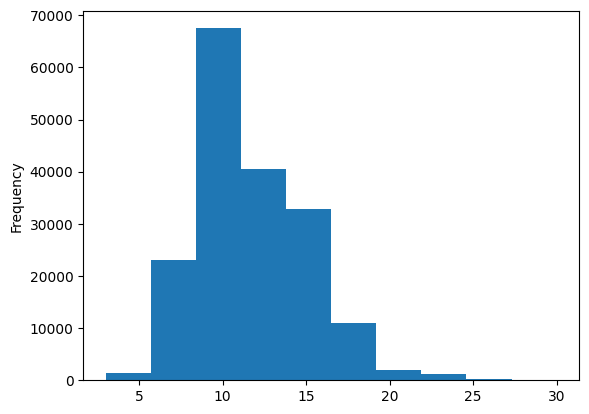

In [13]:
train_df.total_lines.plot.hist()

In [14]:
train_sentences=train_df['text'].tolist()
val_sentences=val_df['text'].tolist()
test_sentences=test_df['text'].tolist()
len(train_sentences),len(val_sentences),len(test_sentences)

(180040, 30212, 30135)

In [15]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [16]:
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

one_hot_encoder=OneHotEncoder(sparse=False)
train_labels_one_hot=one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_one_hot=one_hot_encoder.fit_transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot=one_hot_encoder.fit_transform(test_df['target'].to_numpy().reshape(-1,1))
train_labels_one_hot

C:\Users\farde\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\farde\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\farde\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

train_labels_encoded=label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels_encoded=label_encoder.fit_transform(val_df['target'].to_numpy())
test_labels_encoded=label_encoder.fit_transform(test_df['target'].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [18]:
num_classes=len(label_encoder.classes_)
class_names=label_encoder.classes_
num_classes,class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [20]:
# create a pipeline
model_0=Pipeline([
    ('tf-idf',TfidfVectorizer()),
    ('clf',MultinomialNB())
])

model_0.fit(train_sentences,
            train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [21]:
model_0.score(val_sentences,val_labels_encoded)

0.7218323844829869

In [22]:
baseline_preds=model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [23]:
from helper_functions import calculate_results

In [24]:
baseline_results=calculate_results(val_labels_encoded,baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [25]:
import numpy as np
from tensorflow.keras import layers

In [26]:
# how long is each sentence is
sent_lens=[len(sentence.split()) for sentence in train_sentences]
avg_sent_len=np.mean(sent_lens)
avg_sent_len

26.338269273494777

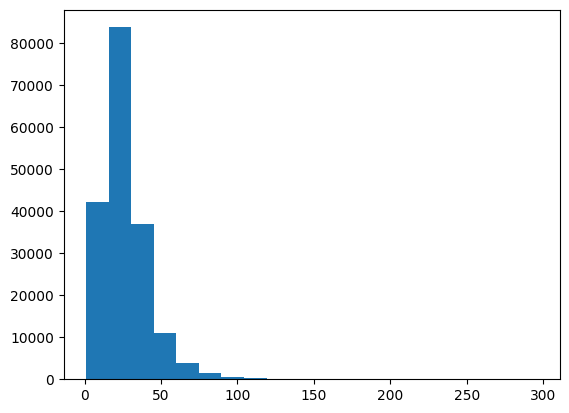

In [27]:
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=20);

In [28]:
# how long of a sentence lenght covers 95% of examples
output_seq_len=int(np.percentile(sent_lens,95))
output_seq_len

55

In [29]:
max(sent_lens)

296

In [30]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_tokens=68000
text_vectorizer=TextVectorization(max_tokens=max_tokens,
                                  output_sequence_length=output_seq_len)

In [31]:
text_vectorizer.adapt(train_sentences)


In [32]:
import random
target_sentence=random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text: {text_vectorizer([target_sentence])}")

Text:
visual and refractive outcomes , keratometry , corneal biomechanical characteristics , and higher order aberrations were compared at the @-year postoperative follow-up .

Length of text: 23

Vectorized text: [[ 290    3 3651   75 9666 1260 4797  395    3   82  923 6130    9   34
    15    2  157  163   94    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [33]:
rct_20k_text_vocab=text_vectorizer.get_vocabulary()
print(f"No. of word in vocab: {len(rct_20k_text_vocab)}")
print(f"Most common word in vocab: {rct_20k_text_vocab[:5]}")
print(f"Least common word in vocab: {rct_20k_text_vocab[-5:]}")


No. of word in vocab: 64841
Most common word in vocab: ['', '[UNK]', 'the', 'and', 'of']
Least common word in vocab: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [34]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

In [35]:
# create token embedding layer
token_embed=layers.Embedding(input_dim=len(rct_20k_text_vocab),
                             output_dim=128,
                             mask_zero=True,
                             name="token_embedding")

In [36]:
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence=text_vectorizer([target_sentence])
print(f"Sentence after vectorization: {vectorized_sentence}\n")
embedded_sentence=token_embed(vectorized_sentence)
print(f'Sentence aftre embedding: {embedded_sentence}\n')
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
 visual and refractive outcomes , keratometry , corneal biomechanical characteristics , and higher order aberrations were compared at the @-year postoperative follow-up .

Sentence after vectorization: [[ 290    3 3651   75 9666 1260 4797  395    3   82  923 6130    9   34
    15    2  157  163   94    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]

Sentence aftre embedding: [[[ 0.03294105 -0.0409288   0.00445759 ... -0.01698666 -0.02550007
   -0.03917699]
  [-0.00314329 -0.02672287 -0.02468429 ... -0.00057226 -0.02178491
   -0.04194916]
  [-0.00858195  0.01060051  0.01003635 ...  0.03985785 -0.03186996
    0.03125802]
  ...
  [ 0.02969548 -0.04819254 -0.00352506 ... -0.02257067  0.02684143
   -0.0010054 ]
  [ 0.02969548 -0.04819254 -0.00352506 ... -0.02257067  0.02684143
   -0.0010054 ]
  [ 0.02969548 -0.04819254 -0.0035

In [37]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
valid_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [38]:
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset=valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

# Model 1: Conv1d

In [39]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
text_vectors=text_vectorizer(inputs)
token_embedding=token_embed(text_vectors)
x=layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(token_embedding)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(num_classes,activation='softmax')(x)
model_1=tf.keras.Model(inputs,outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [40]:
history_1=model_1.fit(train_dataset,
                      steps_per_epoch=int(0.1*len(train_dataset)),
                      epochs=3,
                      validation_data=valid_dataset,
                      validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 10s 11ms/step - loss: 0.9062 - accuracy: 0.6444 - val_loss: 0.6767 - val_accuracy: 0.7453
Epoch 2/3
562/562 [==============================] - 6s 11ms/step - loss: 0.6488 - accuracy: 0.7617 - val_loss: 0.6239 - val_accuracy: 0.7763
Epoch 3/3
562/562 [==============================] - 6s 11ms/step - loss: 0.6117 - accuracy: 0.7779 - val_loss: 0.5918 - val_accuracy: 0.7856


In [41]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5933 - accuracy: 0.7865


[0.5933297872543335, 0.786541759967804]

In [42]:
model_1_pred_probs=model_1.predict(valid_dataset)
model_1_pred_probs,model_1_pred_probs.shape

945/945 [==============================] - 2s 2ms/step


(array([[4.2097098e-01, 1.6034906e-01, 7.5135104e-02, 3.1249398e-01,
         3.1050814e-02],
        [4.6281159e-01, 2.5210741e-01, 1.4372434e-02, 2.6145649e-01,
         9.2520658e-03],
        [1.3133928e-01, 5.5536008e-03, 1.7800307e-03, 8.6128026e-01,
         4.6820023e-05],
        ...,
        [4.5471488e-06, 6.2450784e-04, 7.6557213e-04, 6.2035024e-06,
         9.9859911e-01],
        [5.4675128e-02, 4.7285184e-01, 9.4741195e-02, 6.8484828e-02,
         3.0924702e-01],
        [1.4612466e-01, 7.4572498e-01, 4.3924365e-02, 2.3961723e-02,
         4.0264297e-02]], dtype=float32),
 (30212, 5))

In [43]:
model_1_preds=tf.argmax(model_1_pred_probs,axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1], dtype=int64)>

In [44]:
model_1_result=calculate_results(val_labels_encoded,model_1_preds)
model_1_result

{'accuracy': 78.65417714815305,
 'precision': 0.7834236796534186,
 'recall': 0.7865417714815305,
 'f1': 0.7842920947497432}

In [45]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

# Model 3: Conv1d with character embedding

In [46]:
# create character level tokenizer
def split_char(text):
    return " ".join(list(text))

split_char(target_sentence)

'v i s u a l   a n d   r e f r a c t i v e   o u t c o m e s   ,   k e r a t o m e t r y   ,   c o r n e a l   b i o m e c h a n i c a l   c h a r a c t e r i s t i c s   ,   a n d   h i g h e r   o r d e r   a b e r r a t i o n s   w e r e   c o m p a r e d   a t   t h e   @ - y e a r   p o s t o p e r a t i v e   f o l l o w - u p   .'

In [47]:
train_chars=[split_char(sentence) for sentence in train_sentences]
val_chars=[split_char(sentence) for sentence in val_sentences]
test_chars=[split_char(sentence) for sentence in test_sentences]
print(train_chars[:5])

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .', 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .', 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a n 

In [48]:
char_lens=[len(sentence) for sentence in train_sentences]
mean_char_len=np.mean(char_lens)
mean_char_len #,char_lens

149.3662574983337

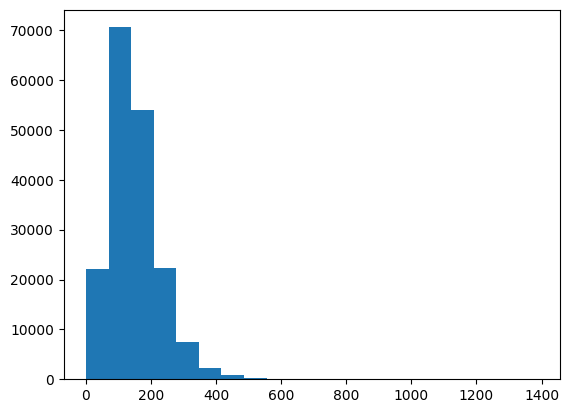

In [49]:
plt.hist(char_lens,bins=20);

In [50]:
output_seq_char_len=int(np.percentile(char_lens,95))
output_seq_char_len

290

In [51]:
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
NUM_CHAR_TOKENS=len(alphabet)+2
char_vectorizer=TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                  output_sequence_length=output_seq_char_len,
                                  name='char_vectorizer')

In [53]:
char_vectorizer.adapt(train_chars)

In [54]:
char_vocab=char_vectorizer.get_vocabulary()
print(f"Number of diff. characters in character vocab: {len(char_vocab)}")
print(f"5 most common character: {char_vocab[:5]}")
print(f"5 least common character: {char_vocab[-5:]}")

Number of diff. characters in character vocab: 28
5 most common character: ['', '[UNK]', 'e', 't', 'i']
5 least common character: ['k', 'x', 'z', 'q', 'j']


In [55]:
random_train_chars=random.choice(train_chars)
print(f"Charified text:\n {random_train_chars}\n")
print(f"lenght of random train chars:\n {len(random_train_chars.split())}\n")
vectorized_char=char_vectorizer([random_train_chars])
print(f"char after vectorization: {vectorized_char}\n")
print(f"Length of vectorized char: {len(vectorized_char[0])}")

Charified text:
 s i x t y - t w o   p a t i e n t s   w e r e   e n r o l l e d   b e t w e e n   j a n u a r y   @   a n d   f e b r u a r y   @   .

lenght of random train chars:
 57

char after vectorization: [[ 9  4 24  3 19  3 20  7 14  5  3  4  2  6  3  9 20  2  8  2  2  6  8  7
  12 12  2 10 22  2  3 20  2  2  6 27  5  6 16  5  8 19  5  6 10 17  2 22
   8 16  5  8 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [56]:
char_embed=layers.Embedding(input_dim=len(char_vocab),
                            output_dim=25,
                            mask_zero=True,
                            name='char_embed')

In [57]:
print(f"charified text:\n {random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars:\n {char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

charified text:
 s i x t y - t w o   p a t i e n t s   w e r e   e n r o l l e d   b e t w e e n   j a n u a r y   @   a n d   f e b r u a r y   @   .

Embedded chars:
 [[[ 0.01278397  0.01371697  0.03928223 ... -0.01021694 -0.03785546
   -0.0181994 ]
  [-0.01515678 -0.02224121  0.03309915 ... -0.02466681 -0.02475905
   -0.04072047]
  [ 0.03793854 -0.01879494 -0.03673791 ...  0.01814323 -0.00052415
    0.01431106]
  ...
  [ 0.00741967 -0.03933031  0.01662866 ... -0.03715906  0.03276375
    0.02398285]
  [ 0.00741967 -0.03933031  0.01662866 ... -0.03715906  0.03276375
    0.02398285]
  [ 0.00741967 -0.03933031  0.01662866 ... -0.03715906  0.03276375
    0.02398285]]]

Character embedding shape: (1, 290, 25)


In [58]:
len(random_train_chars.split())

57

In [59]:
inputs=layers.Input(shape=(1,),dtype='string')
char_vectors=char_vectorizer(inputs)
char_embedding=char_embed(char_vectors)
x=layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(char_embedding)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(num_classes,activation='softmax')(x)
model_3=tf.keras.Model(inputs,outputs,name='model_3_conv1d_char_embedding')

model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [60]:
model_3.summary()

Model: "model_3_conv1d_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 5

In [61]:
train_char_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset=tf.data.Dataset.from_tensor_slices((test_chars,test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [62]:
model_3_history=model_3.fit(train_char_dataset,steps_per_epoch=int(0.1*len(train_char_dataset)),
                            epochs=3,
                            validation_data=val_char_dataset,
                            validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 4s 6ms/step - loss: 1.2654 - accuracy: 0.4914 - val_loss: 1.0466 - val_accuracy: 0.6037
Epoch 2/3
562/562 [==============================] - 3s 6ms/step - loss: 1.0052 - accuracy: 0.5976 - val_loss: 0.9354 - val_accuracy: 0.6290
Epoch 3/3
562/562 [==============================] - 3s 6ms/step - loss: 0.9328 - accuracy: 0.6338 - val_loss: 0.8697 - val_accuracy: 0.6622


In [63]:
model_3_pred_probs=model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 2s 3ms/step


array([[0.1841235 , 0.26471525, 0.09729472, 0.40850466, 0.04536185],
       [0.1287113 , 0.73498136, 0.00718759, 0.09467968, 0.03444004],
       [0.1646022 , 0.40051943, 0.16725698, 0.20054923, 0.06707215],
       ...,
       [0.01945933, 0.04911771, 0.38671687, 0.03210554, 0.51260054],
       [0.03299478, 0.20908113, 0.1098217 , 0.03582603, 0.6122764 ],
       [0.4366874 , 0.43355542, 0.07297579, 0.05164911, 0.00513221]],
      dtype=float32)

In [64]:
model_3_preds=tf.argmax(model_3_pred_probs,axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 1, ..., 4, 4, 0], dtype=int64)>

In [65]:
model_3_results=calculate_results(val_labels_encoded,model_3_preds)
model_3_results

{'accuracy': 65.04038130544154,
 'precision': 0.6433339369606244,
 'recall': 0.6504038130544154,
 'f1': 0.6387200611766038}

In [66]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [67]:
train_df['line_number'].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

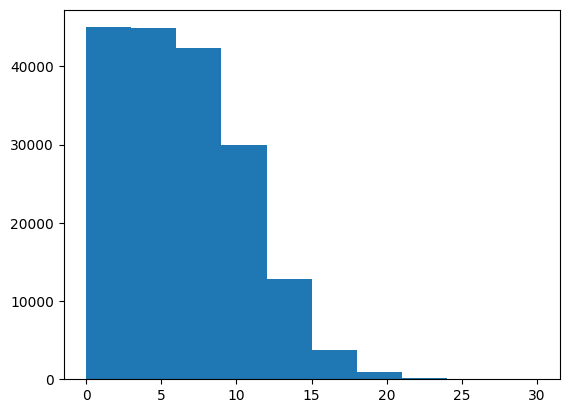

In [69]:
plt.hist(train_df['line_number']);

In [72]:
train_line_numbers_one_hot=tf.one_hot(train_df['line_number'].to_numpy(),depth=15)
val_line_numbers_one_hot=tf.one_hot(train_df['line_number'].to_numpy(),depth=15)
test_line_numbers_one_hot=tf.one_hot(train_df['line_number'].to_numpy(),depth=15)

train_line_numbers_one_hot[:10],train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

In [73]:
train_df['total_lines'].value_counts()

total_lines
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

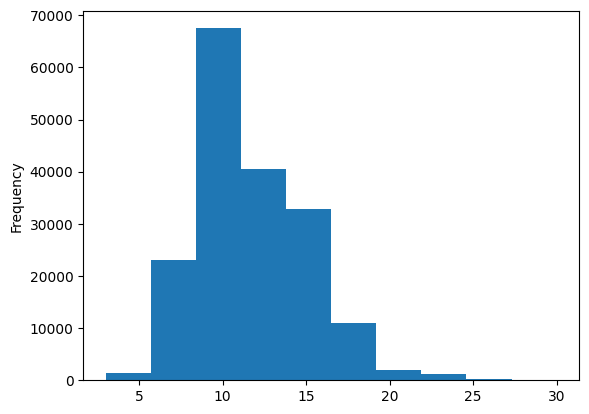

In [74]:
train_df['total_lines'].plot.hist()

In [75]:
np.percentile(train_df.total_lines,98)

20.0

In [76]:
train_total_lines_one_hot=tf.one_hot(train_df['total_lines'].to_numpy(),depth=20)
train_total_lines_one_hot.shape,train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [77]:
train_total_lines_one_hot=tf.one_hot(train_df['total_lines'].to_numpy(),depth=20)
val_total_lines_one_hot=tf.one_hot(train_df['total_lines'].to_numpy(),depth=20)
test_total_lines_one_hot=tf.one_hot(train_df['total_lines'].to_numpy(),depth=20)


In [86]:
1 # token inputs
token_inputs=layers.Input(shape=[],dtype="string",name="token_inputs")
token_vectors=text_vectorizer(token_inputs)
token_embeddings=token_embed(token_vectors)
token_outputs=layers.Dense(128,activation='relu')(token_embeddings)
token_outputs=layers.Flatten()(token_outputs)
token_model=tf.keras.Model(token_inputs,token_outputs)

# 2 char inputs
char_inputs=layers.Input(shape=(1,),dtype='string',name="char_inputs")
char_vectors=char_vectorizer(char_inputs)
char_embedding=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embedding)
char_model=tf.keras.Model(char_inputs,char_bi_lstm)

#print(token_model.summary())
#print(char_model.summary())

In [89]:
# 3 line numbers model
line_number_inputs=layers.Input(shape=(15,),dtype="float32",name='line_number_input')
x=layers.Dense(32,activation='relu')(line_number_inputs)
line_number_model=tf.keras.Model(line_number_inputs,x)

# 4 total line model
total_line_inputs=layers.Input(shape=(20,),dtype=tf.float32,name="total_line_input")
y=layers.Dense(32,activation="relu")(total_line_inputs)
total_lines_model=tf.keras.Model(total_line_inputs,y)

# 5 combine token and char embedding
combined_embedding=layers.Concatenate(name="char_token_hybrid_embedding")([token_model.output,char_model.output])
z=layers.Dense(256,activation="relu")(combined_embedding)
z=layers.Dropout(0.5)(z)

#6 combine positional embedding with combined token and char embedding
tribrid_embedding=layers.Concatenate(name='char_token_positional_embedding')([line_number_model.output,
                                                                              total_lines_model.output,
                                                                              z])

# 7 create output layer
output_layer=layers.Dense(5,activation="softmax",name="output_layer")(tribrid_embedding)

# 8 put together model
model_5=tf.keras.Model([line_number_model.input,
                        total_lines_model.input,
                        token_model.input,
                        char_model.input],
                       output_layer,
                       name="model_5_tribrid_embedding_model")

In [90]:
model_5.summary()

Model: "model_5_tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 55)          0           ['token_inputs[0][0]']           
 ization)                                                                                         
                                                                                                  
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_embedding (Embedding)    (None, 55, 128)      8299648     ['t

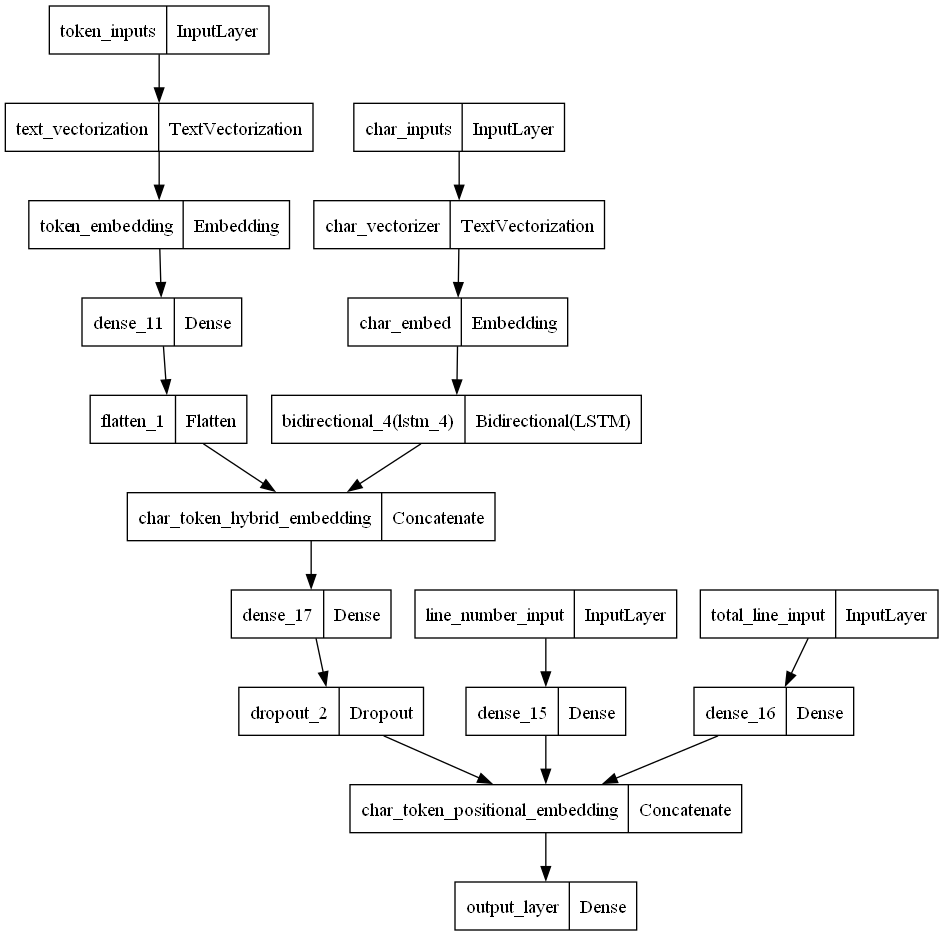

In [91]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [118]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'],
                run_eagerly=True)


In [119]:
train_char_token_pos_data=tf.data.Dataset.from_tensors((train_line_numbers_one_hot,
                                                              train_total_lines_one_hot,
                                                              train_sentences,
                                                              train_chars))
train_char_token_pos_labels=tf.data.Dataset.from_tensors(train_labels_one_hot)
train_char_token_pos_dataset=tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_labels))
train_char_token_pos_dataset=train_char_token_pos_data.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_pos_data=tf.data.Dataset.from_tensors((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_char_token_pos_labels=tf.data.Dataset.from_tensors(val_labels_one_hot)
val_char_token_pos_dataset=tf.data.Dataset.zip((val_char_token_pos_data,val_char_token_pos_labels))
val_char_token_pos_dataset=val_char_token_pos_data.batch(32).prefetch(tf.data.AUTOTUNE)

# test_char_token_pos_data=tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
#                                                               test_total_lines_one_hot,
#                                                               test_sentences,
#                                                               test_chars))
# test_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
# test_char_token_pos_dataset=tf.data.Dataset.zip((test_char_token_pos_data,test_char_token_pos_labels))
# test_char_token_pos_dataset=test_char_token_pos_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [121]:
history_model_5=model_5.fit(train_char_token_pos_dataset,
                            steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
                            epochs=3,
                            validation_data=val_char_token_pos_dataset,
                            validation_steps=int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/3


C:\Users\farde\AppData\Local\Temp\ipykernel_4908\1651479279.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_model_5=model_5.fit_generator(train_char_token_pos_dataset,


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.